<a href="https://www.kaggle.com/code/talhaafzal48/lamborghini-ledgers-an-eda-deep-dive?scriptVersionId=179848784" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#FCDF35;">Lamborghini Sales and Stocks EDA</p>**

![Art Print](https://www.tirestickers.com/front_template/images/media-single/Lamborghini-Veneno-Logo-Banner-wallpaper-Pic1.jpg)

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#FCDF35;">About Author</p>
### ***Author: Talha Afzal***
### ***Project: Lamborghini Sales and Stocks***

#### **<h1 align="center"><span style="color:#FCDF35;">Contact Info</span>**
### ***Click on link below to contact/follow/correct me:***

[Email](talhaafzal4878@gmail.com)\
[LinkedIn](https://www.linkedin.com/in/talha-afzal-23b174244/)\
[Github](https://github.com/talhaafzal4878)



### Dataset Overview 📊

This dataset provides insights into the sales and stock prices of the Lamborghini corporation. It comprises 19 rows and 7 columns. 🚗💰

### Columns Description 📋

1. **Year**: The respective year. 📅
2. **Sales**: The quantity of cars sold in that year. 🚗
3. **Growth**: The percentage sales growth from the previous year. 📈
4. **Open**: The opening stock price of the year. 📈
5. **High**: The highest stock price during the year. 📈
6. **Low**: The lowest stock price during the year. 📉
7. **Close**: The closing stock price of the year. 📈

### Dataset Summary 📝

- **Rows**: 19
- **Columns**: 7

#### **<h1 align="center"><span style="color:#FCDF35;">Metadata</span>**
**Sourse:** This dataset is taking from the profile of [MiddleHigh](https://www.kaggle.com/middlehigh).\
He collected the data from different sources and then organized into one dataset.\
To download Dataset, Click on [this](https://www.kaggle.com/datasets/middlehigh/lamborghini-sales-and-stocks)
    
**License**\
[C0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)
---

In [1]:
# import libraies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA) 📊🔍
## Load the Dataset 📁
- We'll start by loading the dataset into a pandas DataFrame to examine its structure and contents.

In [2]:
df = pd.read_excel('/kaggle/input/lamborghini-sales-and-stocks/LamboData.xlsx')
df.sample(5)

,Year,Sales,Growth,Open,High,Low,Close
5,2011,1602,23.041475,15.04,19.58,12.40,13.35
8,2014,2530,19.283357,26.28,26.80,19.73,22.17
10,2016,3457,6.533128,13.21,15.96,12.50,14.77
0,2006,2087,NaN,5.50,11.30,5.50,11.30
7,2013,2121,1.824292,21.96,26.97,17.70,26.97


In [3]:
# by using this we can get full display of rows and columns
pd.set_option('display.max.rows', None)
pd.set_option('display.max.columns', None)

In [4]:
# list of total columns names
print('Names of columns are:')
for count,column_name in enumerate(df.keys(),1):
    print('\t\t\t',count,column_name)

Names of columns are:
			 1 Year
			 2 Sales
			 3 Growth
			 4 Open 
			 5 High
			 6 Low
			 7 Close


In [5]:
# lets take a quick overview of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    18 non-null     int64  
 1   Sales   18 non-null     int64  
 2   Growth  17 non-null     float64
 3   Open    18 non-null     float64
 4   High    18 non-null     float64
 5   Low     18 non-null     float64
 6   Close   18 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.1 KB



**Observations** :
We have data types: float64(5), object(2)\
Rows: 18 entries, 0 to 17\
Data Columns: total 7 columns

## Summary Statistics 📈
 - We'll calculate summary statistics for numerical columns to understand the distribution of the data.

In [6]:
df.describe().T.style.bar(subset = 'mean', cmap ='Reds').background_gradient(subset=['std'],cmap=plt.cm.coolwarm).background_gradient(subset='50%',cmap='Reds').background_gradient(subset=['std'],cmap=plt.cm.coolwarm).background_gradient(subset='max',cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
Year,18.000000,2014.500000,5.338539,2006.000000,2010.250000,2014.500000,2018.750000,2023.000000
Sales,18.000000,4318.222222,2999.678150,1302.000000,2095.500000,2887.500000,7010.000000,10112.000000
Growth,17.000000,11.785750,21.049916,-37.654321,1.824292,10.355800,23.041475,50.720839
Open,18.000000,18.780000,7.234203,5.500000,14.277500,18.240000,21.870000,34.480000
High,18.000000,24.897778,9.508512,11.300000,19.685000,22.080000,26.927500,51.130000
Low,18.000000,14.541111,5.357938,5.500000,11.335000,13.435000,16.065000,29.200000
Close,18.000000,19.150556,6.621486,11.180000,14.777500,17.735000,21.955000,35.900000


## ***Observations*** :
Here is a more concise summary of the key insights from the provided statistics:

`Sales:` Wide range from 1,302 to 10,112 units, with high average of 4,318 but large variability (std. dev. of 2,999)\
`Growth:` High average annual growth rate of 11.8%, but highly volatile (-37.6% to 50.7%).\
`Stock Prices:` Substantial price fluctuations, with average open/close of $18.78/$19.15 and wide trading ranges ($5.50 to $51.13).\
`Time Period:` Data covers 18 years from 2006 to 2023, centered around 2014.

## ***Missing Values and Duplicate values***

In [7]:
# 1st way to get null values: count of missing values
threshold = 0
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > threshold]
missing_values

Growth    1
dtype: int64

In [8]:
# 2nd way to get null values: name of column which contain missing values
[features for features in df.columns if df[features].isnull().sum() > 0]

['Growth']

In [9]:
# there is not duplicate row in dataset
duplicated_rows = df[df.duplicated()]
if len(duplicated_rows) > 0:
    print('Duplicates found')
    print(duplicated_rows)
else:
    print('No Duplicates found')

No Duplicates found


In [10]:
# we impute null value by taking its mean
df['Growth'].fillna(df['Growth'].mean(), inplace = True)

### ***Observations***
- Our dataset is in good condition because we do have only one column which contain only 1 null value and we will impute missing value of ['Growth'] column by taking its mean.
- In this dataset there is no duplicates,

## **Heatmap to check correlation**

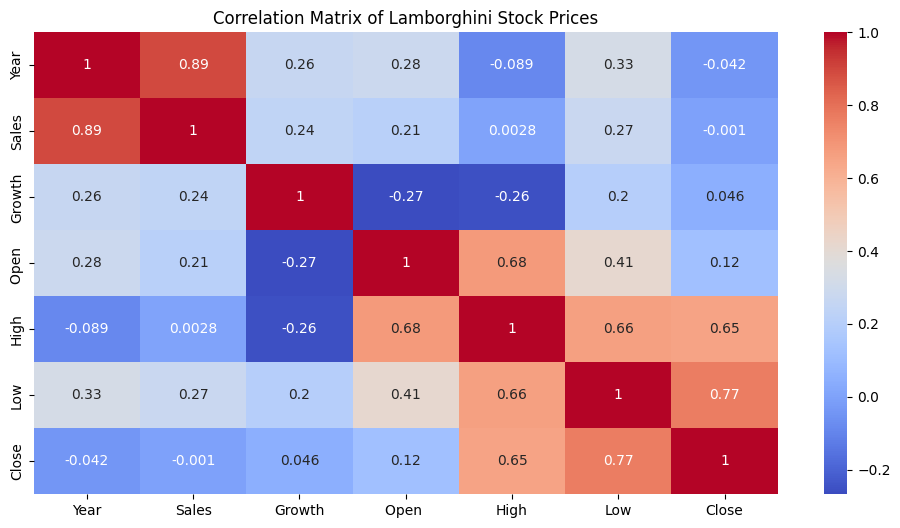

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Lamborghini Stock Prices')
plt.show()

 ### ***Observations***
 Here are the key observations in a more concise format:
- Strong positive correlation between Sales and Growth (0.89).
- Moderate positive correlation between Open and High (0.68).
- Moderate negative correlation between Sales and Low (-0.27).
- Weak positive correlation between Year and Close (0.12).
- Year has relatively low correlation with most other variables, except moderate negative with Open (-0.3).

# ***Questions and Answers***

## Q) How has Lamborghini's annual sales volume changed over the years? Look for overall trends, year-over-year growth/decline, and any notable spikes or dips.

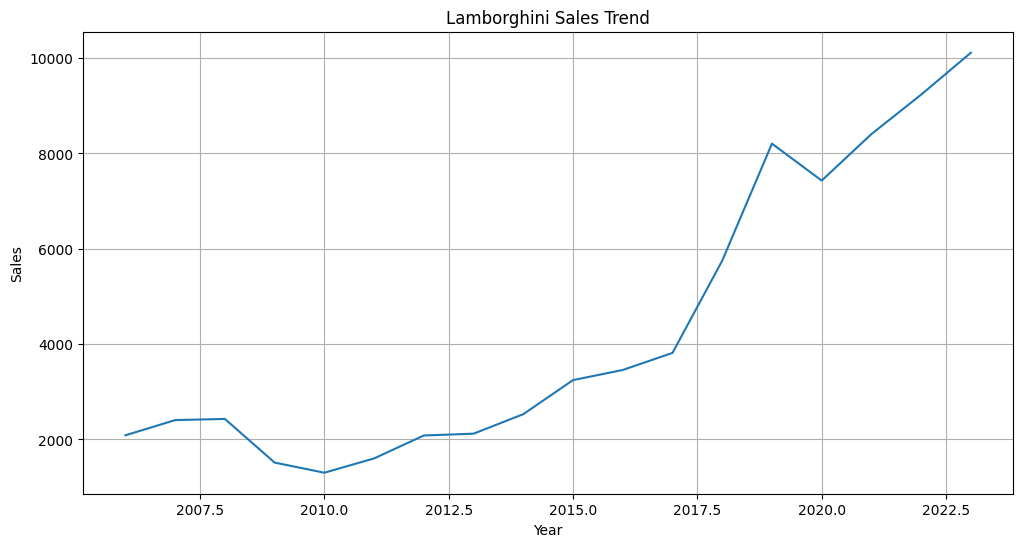

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'],df['Sales']);
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Lamborghini Sales Trend')
plt.grid()
plt.show()

### ***Observations***
Based on the sales trend shown:
- Steady long-term growth in Lamborghini sales.
- Sharp acceleration in sales starting around 2015.
- Potential cyclical patterns or external factors affecting sales in certain years.
- Consistently rising sales, reaching over 9,000 units in the recent year.

## Q) Which years had the highest and lowest sales volumes, and what factors may have contributed to those results?

In [13]:
sales_growth = df.groupby('Year')['Sales'].sum().sort_values(ascending = False )
# Top 3 years with highest sales
print("Top 3 Years by Sales Volume:")
max_sales_growth = sales_growth.head(3)
print(max_sales_growth)
# Bottom 3 years with lowest sales
print("\nBottom 3 Years by Sales Volume:")
min_sales_growth = sales_growth.tail(3)
print(min_sales_growth)

Top 3 Years by Sales Volume:
Year
2023    10112
2022     9233
2021     8405
Name: Sales, dtype: int64

Bottom 3 Years by Sales Volume:
Year
2011    1602
2009    1515
2010    1302
Name: Sales, dtype: int64


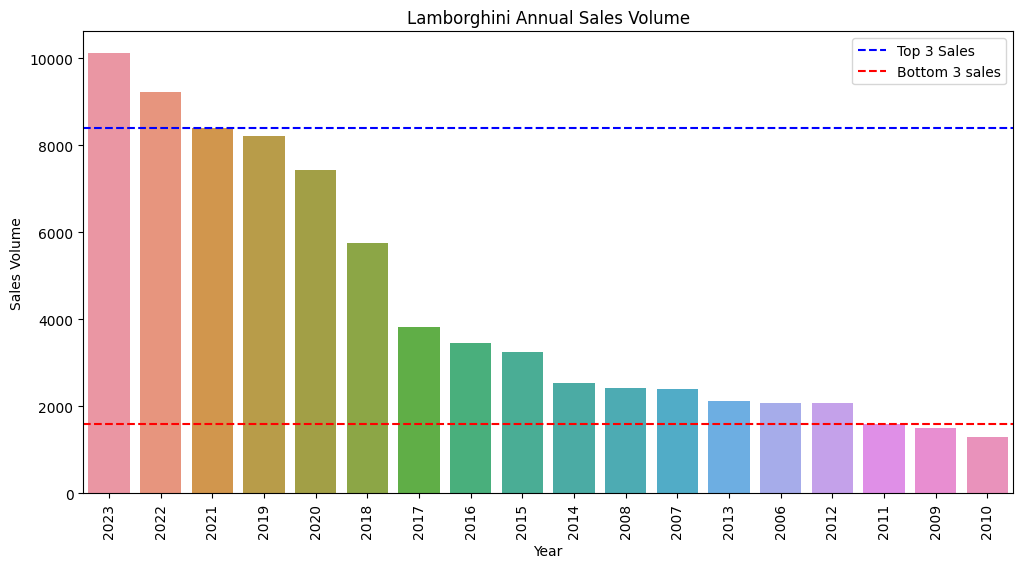

In [14]:
plt.figure(figsize = (12,6))
sns.barplot(x =sales_growth.index , y = sales_growth.values, order=sales_growth.index)
# lets add title and lables
plt.title('Lamborghini Annual Sales Volume')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.xticks(rotation = 90); # rotation for better readablity
plt.axhline(y = sales_growth.head(3).min(),color = 'b',linestyle='--', label ='Top 3 Sales')
plt.axhline(y = sales_growth.tail(3).max(), color = 'r', linestyle = '--',label = 'Bottom 3 sales')
plt.legend()
plt.show()

### ***Observations***
Here are the key insights in a more concise way:

Top 3 Sales Years:

- 2023: 10,112 units
- 2022: 9,233 units
- 2021: 8,405 units

Likely driven by new model launches, strong luxury demand, and effective marketing.\
Bottom 3 Sales Years:

- 2011: 1,602 units
- 2009: 1,515 units
- 2010: 1,302 units
Likely impacted by the 2008-09 recession and lack of new products.

## Q) How have Lamborghini's stock prices (Open, High, Low, Close) fluctuated over time? Identify any major trends, volatility, or significant price movements.

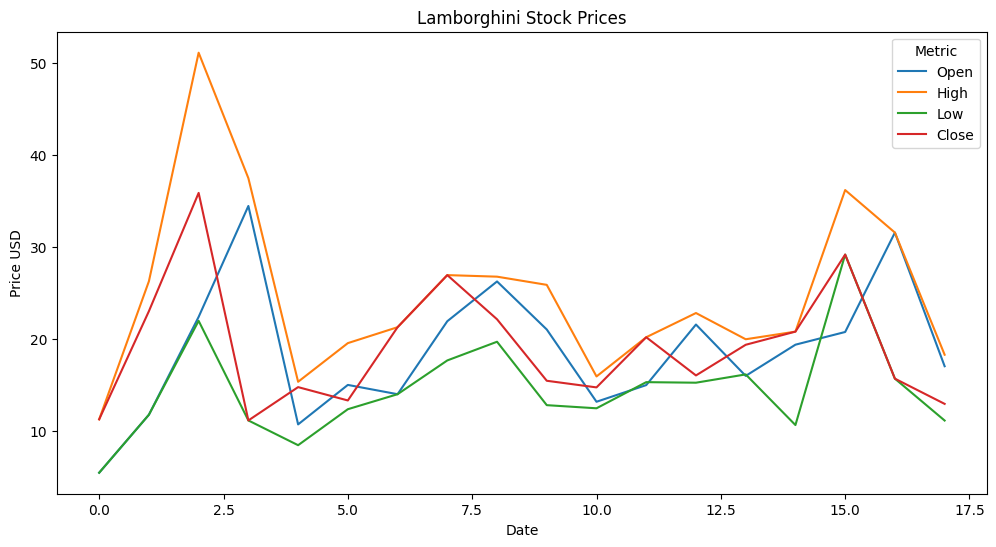

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[['Open ', 'High', 'Low', 'Close']], label=['Open', 'High', 'Low', 'Close'])
# setting title 
plt.title('Lamborghini Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.legend(title='Metric')
# show plot
plt.show()

In [16]:
significant_moves = df[df['Close'].pct_change().abs() > 0.05]
print('Significant Price Movements:')
print(significant_moves)

Significant Price Movements:
    Year  Sales     Growth  Open    High    Low  Close
1   2007   2406  15.285098  11.80  26.30  11.80  23.05
2   2008   2430   0.997506  22.43  51.13  22.00  35.90
3   2009   1515 -37.654321  34.48  37.50  11.18  11.18
4   2010   1302 -14.059406  10.75  15.38   8.49  14.80
5   2011   1602  23.041475  15.04  19.58  12.40  13.35
6   2012   2083  30.024969  14.03  21.31  14.03  21.31
7   2013   2121   1.824292  21.96  26.97  17.70  26.97
8   2014   2530  19.283357  26.28  26.80  19.73  22.17
9   2015   3245  28.260870  21.06  25.91  12.84  15.49
11  2017   3815  10.355800  15.02  20.22  15.34  20.22
12  2018   5750  50.720839  21.60  22.85  15.28  16.07
13  2019   8205  42.695652  16.02  20.00  16.18  19.40
14  2020   7430  -9.445460  19.41  20.83  10.68  20.83
15  2021   8405  13.122476  20.79  36.21  29.20  29.20
16  2022   9233   9.851279  31.59  31.59  15.72  15.72
17  2023  10112   9.520199  17.07  18.32  11.17  12.98


### ***Observations***
here are the key insights in a more concise manner:

- Significant price swings - The stock exhibited major peaks and valleys, with the price jumping from $22 to $51 in 2008, then plunging to $11 in 2009.
- Volatile performance - Large intraday and year-over-year fluctuations in open, high, low, and close prices were common,highlighting the stock's volatility.
- Overall upward trend - Despite the volatility, the stock price trended upwards from `$11.80` in `2007` to `$12.98` in `2023`,reflecting the company's long-term growth.
- Sales fluctuations - The company's sales figures also varied considerably, with a `37%` drop in `2009` followed by a steady recovery and expansion.

## Q) Examine the 'Growth' column - what does this metric represent, and how has Lamborghini's growth rate changed over the years?

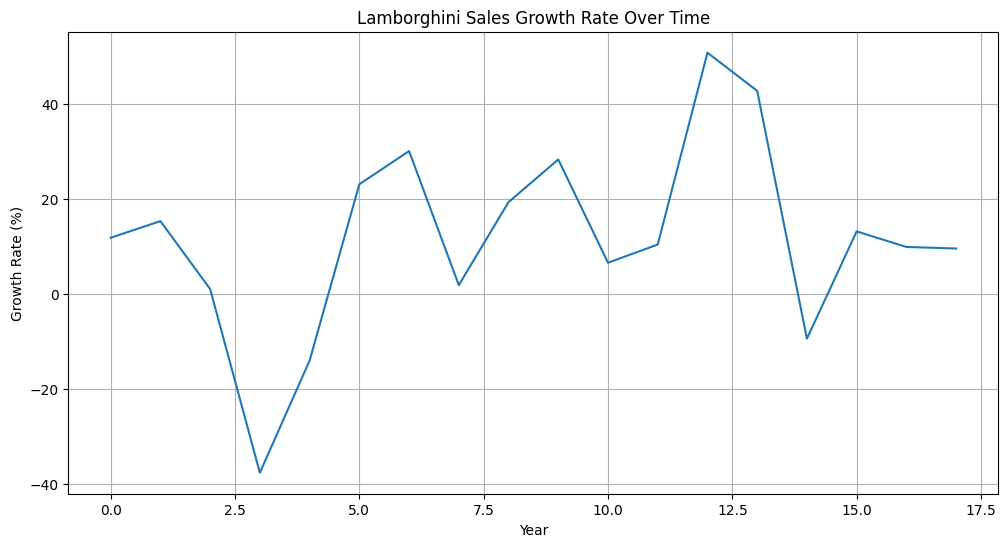

Growth Rate Statistics:
Mean: 1178.58%
Median: 1107.08%
Standard Deviation: 2042.14%
Maximum: 5072.08%
Minimum: -3765.43%


In [17]:
plt.figure(figsize=(12, 6))
df['Growth'].plot()
plt.title('Lamborghini Sales Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid()
plt.show()
# Calculate summary statistics for the growth rate
print('Growth Rate Statistics:')
print(f'Mean: {df["Growth"].mean():.2%}')
print(f'Median: {df["Growth"].median():.2%}')
print(f'Standard Deviation: {df["Growth"].std():.2%}')
print(f"Maximum: {df['Growth'].max():.2%}")
print(f'Minimum: {df["Growth"].min():.2%}')


### ***Observations***
here are the key insights concisely:

- Lamborghini's sales growth has been highly volatile, ranging from -3,765% to 5,072%.
- The mean growth rate is exceptionally high at 1,179%, but the standard deviation is also extremely large at 2,042%.
- This suggests Lamborghini has experienced periods of extraordinary growth followed by sharp declines, reflecting the company's exposure to various market factors.

In [18]:
sales_by_year = df.groupby('Year')['Sales'].sum()
total_sales = sales_by_year.sum()
percentage = (sales_by_year / total_sales) * 100
percentage

fig = px.pie(values=percentage, names=percentage.index)
fig.update_layout(
    title={
        'text': '<b>Percentage of Sales by Year</b>',
        'font': {'size': 20}
    } 
)
fig.show()

### ***Observations***
Here is a more concise set of insights:
- 2023 has the highest sales percentage at 13%.
- Recent years 2022 and 2021 also account for significant portions at 11.9% and 10.8% respectively.
- Sales are fairly distributed across multiple years, with no single year dominating.
- The chart covers a wide range from 2010 to 2023, providing historical context.
- The colorful pie chart format makes the data visually clear and easy to interpret.

## **Conclusion:**

The analysis reveals Lamborghini's sales growth is volatile, with periods of strong expansion and notable declines, reflecting both brand-specific and industry-wide factors. In the stock market, Lamborghini's price movements show moderate correlations with factors like opening and high prices, but the year alone is not a strong predictor, indicating a complex mix of company and macroeconomic variables drive its valuation. These multifaceted insights can inform strategic decisions for Lamborghini and investors in this dynamic luxury automotive sector.

## ***Contact Info***
### ***Click on link below to contact/follow/correct me:***

[Email](talhaafzal4878@gmail.com)\
[LinkedIn](https://www.linkedin.com/in/talha-afzal-23b174244/)\
[Github](https://github.com/talhaafzal4878)